In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import distance
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('final_data/fifa_cleaned_all_columns.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
columns = ['overall', 'potential', 
           'age', 'height_cm', 'weight_kg', 'league_level', 
           'skill_moves', 'international_reputation', 
           'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
           'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
           'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
           'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
           'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 
           'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
           'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
           'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
           'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 
           #### Traits
           'One Club Player', 'Avoids Using Weaker Foot', 'Playmaker', 'Dives Into Tackles', 'Finesse Shot', 
           'Power Free-Kick', 'Leadership', 'Power Header', 'Technical Dribbler', 'Early Crosser', 'Takes Finesse Free Kicks', 
           'Through Ball', 'Giant Throw-in', 'Beat Offside Trap', 'Outside Foot Shot', 'Long Passer', 'Set Play Specialist', 'Chip Shot', 
           'Diver', 'Team Player', 'Injury Free', 'Injury Prone', 'Swerve Pass', 'Solid Player', 'Selfish', 'Speed Dribbler', 'Flair', 
           'Long Shot Taker', 'Long Throw-in', 'Backs Into Player', 'Target Forward', 
           #### Newly created
           'att_workrate', 'def_workrate', 'body_Lean', 'body_Normal', 'body_Stocky', 'body_Unique', 'right_foot', 'left_foot', 
           'injury_risk', 'teamwork', 'passing_traits', 'attacking_traits', 'dribbling_traits', 'defending_traits']

positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
           'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 
           'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [4]:
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,season,diff,One Club Player,Avoids Using Weaker Foot,Playmaker,Dives Into Tackles,Finesse Shot,Power Free-Kick,Leadership,Power Header,Technical Dribbler,Early Crosser,Takes Finesse Free Kicks,Through Ball,Giant Throw-in,Beat Offside Trap,Outside Foot Shot,Long Passer,Set Play Specialist,Chip Shot,Diver,Team Player,Injury Free,Injury Prone,Swerve Pass,Solid Player,Selfish,Speed Dribbler,Flair,Long Shot Taker,Long Throw-in,Backs Into Player,Target Forward,Speedster,Complete Defender,Dribbler,Tackling,Acrobat,Poacher,Crosser,FK Specialist,Complete Forward,Complete Midfielder,Engine,Clinical Finisher,Aerial Threat,Tactician,Distance Shooter,Strength,att_workrate,def_workrate,body_Lean,body_Normal,body_Stocky,body_Unique,right_foot,left_foot,injury_risk,teamwork,passing_traits,attacking_traits,dribbling_traits,defending_traits
0,158023,L. Messi,CF,93,95,100500000.0,550000.0,27,169,67,FC Barcelona,Spain Primera Division,1.0,CF,Argentina,Left,3,4,5,Medium/Low,Normal,"#Speedster, #Dribbler, #FK Specialist, #Acroba...","Finesse Shot, Speed Dribbler (AI), One Club Pl...",93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,87.0,25,21,20,6,11,15,14,8,NaN,92,92,92,95,93,93,93,95,95,95,95,93,82,82,82,93,65,65,65,65,65,57,48,48,48,57,18,1415,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,3,5,0,1,0,1,1,0
1,20801,Cristiano Ronaldo,"LW, LM",92,92,79000000.0,375000.0,29,185,80,Real Madrid CF,Spain Primera Division,1.0,LW,Portugal,Right,4,5,5,High/Low,Normal,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,86.0,22,31,23,7,11,15,14,11,NaN,92,92,92,92,92,92,92,92,92,92,92,90,80,80,80,90,66,66,66,66,66,60,55,55,55,60,19,1415,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0,1,0,0,5,4,0,0,0,1,1,0
2,9014,A. Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,180,80,FC Bayern München,German 1. Bundesliga,1.0,SUB,Netherlands,Left,2,4,5,High/Low,Normal,"#Speedster, #Dribbler, #Distance Shooter, #Acr...","Diver, Injury Prone, Avoids Using Weaker Foot,...",93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,84.0,29,26,26,10,8,11,5,15,NaN,87,87,87,90,90,90,90,90,90,90,90,90,81,81,81,90,67,67,67,67,67,58,49,49,49,58,17,1415,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [5]:
#Extract all relevant columns
player_all = df[columns]
player_all.head()

,overall,potential,age,height_cm,weight_kg,league_level,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,One Club Player,Avoids Using Weaker Foot,Playmaker,Dives Into Tackles,Finesse Shot,Power Free-Kick,Leadership,Power Header,Technical Dribbler,Early Crosser,Takes Finesse Free Kicks,Through Ball,Giant Throw-in,Beat Offside Trap,Outside Foot Shot,Long Passer,Set Play Specialist,Chip Shot,Diver,Team Player,Injury Free,Injury Prone,Swerve Pass,Solid Player,Selfish,Speed Dribbler,Flair,Long Shot Taker,Long Throw-in,Backs Into Player,Target Forward,att_workrate,def_workrate,body_Lean,body_Normal,body_Stocky,body_Unique,right_foot,left_foot,injury_risk,teamwork,passing_traits,attacking_traits,dribbling_traits,defending_traits
0,93,95,27,169,67,1.0,4,5,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,87.0,25,21,20,92,92,92,95,93,93,93,95,95,95,95,93,82,82,82,93,65,65,65,65,65,57,48,48,48,57,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,3,5,0,1,0,1,1,0
1,92,92,29,185,80,1.0,5,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,86.0,22,31,23,92,92,92,92,92,92,92,92,92,92,92,90,80,80,80,90,66,66,66,66,66,60,55,55,55,60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0,1,0,0,5,4,0,0,0,1,1,0
2,90,90,30,180,80,1.0,4,5,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,84.0,29,26,26,87,87,87,90,90,90,90,90,90,90,90,90,81,81,81,90,67,67,67,67,67,58,49,49,49,58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0,1,0,0,2,5,1,-1,0,2,1,0
3,90,90,32,195,95,1.0,4,5,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,84.0,25,41,27,90,90,90,87,89,89,89,87,89,89,89,86,79,79,79,86,64,68,68,68,64,59,58,58,58,59,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,5,4,0,1,0,1,1,0
4,89,89,30,170,65,1.0,4,5,75.0,72.0,89.0,91.0,59.0,63.0,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,83.0,57,57,56,80,80,80,89,85,85,85,89,89,89,89,89,89,89,89,89,79,80,80,80,79,73,66,66,66,73,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0,1,0,0,5,4,0,0,1,1,1,0


In [6]:
#Extract the players' main position based on the column "player_positions"
def get_position(club_pos):
    pos = club_pos.split(",")[0]
    return pos
position = df.apply(lambda x: get_position(x['player_positions']), axis=1)
position

0          CF
1          LW
2          RM
3          ST
4          CM
         ... 
126283    CDM
126284     CM
126285     CM
126286     ST
126287    CAM
Length: 126288, dtype: object

In [7]:
scaler = MinMaxScaler()
scaler.fit(player_all)
player_all_scaled = scaler.transform(player_all)

In [8]:
player_all_scaled[5]

array([0.90740741, 0.92727273, 0.28947368, 0.54      , 0.52459016,
       0.        , 0.75      , 1.        , 0.81578947, 0.9125    ,
       0.80821918, 0.89189189, 0.36363636, 0.8       , 0.79518072,
       0.95294118, 0.75903614, 0.82666667, 0.90361446, 0.91764706,
       0.90361446, 0.87058824, 0.6125    , 0.9125    , 0.88311688,
       0.76315789, 0.86666667, 0.93055556, 0.5375    , 0.85882353,
       0.63636364, 0.85714286, 0.72151899, 0.85542169, 0.79069767,
       0.37349398, 0.90588235, 0.85882353, 0.87058824, 0.83333333,
       0.26436782, 0.41666667, 0.32941176, 0.92307692, 0.92307692,
       0.92307692, 0.89855072, 0.92647059, 0.92647059, 0.92647059,
       0.89855072, 0.92753623, 0.92753623, 0.92753623, 0.89393939,
       0.796875  , 0.796875  , 0.796875  , 0.89393939, 0.70967742,
       0.68253968, 0.68253968, 0.68253968, 0.70967742, 0.62295082,
       0.53030303, 0.53030303, 0.53030303, 0.62295082, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
svd1 = TruncatedSVD(n_components=10, n_iter=10, random_state=42)
player_embedding_10 = svd1.fit_transform(player_all_scaled)

svd2 = TruncatedSVD(n_components=15, n_iter=10, random_state=42)
player_embedding_15 = svd2.fit_transform(player_all_scaled)

svd3 = TruncatedSVD(n_components=20, n_iter=10, random_state=42)
player_embedding_20 = svd3.fit_transform(player_all_scaled)

**Player search (for cosine similarity and Euclidean distance)**
- Enter the player name for variable keyword in the following cell
- Get the row index (the leftmost column), then enter it as row_id in the next cell

In [10]:
#Search players, just enter the keyword
keyword = "Ndidi"

df[df['short_name'].str.contains(keyword)][['sofifa_id','short_name' ,'season','overall', 'potential', 'injury_risk', 'teamwork', 'passing_traits', 'attacking_traits', 'dribbling_traits', 'defending_traits']]

,sofifa_id,short_name,season,overall,potential,injury_risk,teamwork,passing_traits,attacking_traits,dribbling_traits,defending_traits
25555,226790,W. Ndidi,1516,60,76,0,0,0,0,0,0
31802,226790,O. Ndidi,1617,72,83,0,0,1,0,0,0
44979,226790,O. Ndidi,1718,77,86,0,0,1,1,0,0
60311,226790,W. Ndidi,1819,80,85,0,0,1,1,0,0
76245,226790,W. Ndidi,1920,81,84,0,0,0,0,0,0
92435,226790,W. Ndidi,2021,84,88,0,0,0,1,0,0
109257,226790,W. Ndidi,2122,85,88,0,0,0,1,0,0


In [11]:
#Just enter the row index from the table above as row_id and run all other cells below
row_id = 109257

In [12]:
#Cosine similarity, change the player_embedding_20 variable if another SVD model is used (2 changes needed)
season = df.iloc[row_id]['season']
df['cos_similarity'] = cosine_similarity(player_embedding_20[row_id].reshape(1, -1),player_embedding_20).tolist()[0]

#Comparison with all players
df[['sofifa_id', 'short_name', 'season', 'overall', 'potential', 'cos_similarity']].sort_values(by='cos_similarity', ascending=False).iloc[1:].head(20)

,sofifa_id,short_name,season,overall,potential,cos_similarity
92435,226790,W. Ndidi,2021,84,88,0.999938
93577,226515,Andrei Girotto,2021,76,76,0.998282
60066,193474,I. Gueye,1819,82,82,0.998017
76748,225126,E. Skhiri,1920,78,82,0.997924
2312,186589,I. Radovanovic,1415,71,76,0.997601
76055,193474,I. Gueye,1920,83,83,0.997588
29715,212501,L. Dendoncker,1617,76,83,0.997146
93571,225659,G. Rodríguez,2021,76,78,0.996877
75929,135507,Fernandinho,1920,87,87,0.996394
1162,178251,R. Danzé,1415,74,74,0.995702


In [13]:
#Only for players in the same season
df[df['season']==season][['sofifa_id', 'short_name', 'season', 'overall', 'potential', 'cos_similarity']].sort_values(by='cos_similarity', ascending=False).iloc[1:].head(20)

,sofifa_id,short_name,season,overall,potential,cos_similarity
110784,226515,Andrei Girotto,2122,75,75,0.995052
110977,186589,I. Radovanović,2122,74,74,0.994640
112234,214196,D. Bocanegra,2122,72,72,0.994049
111552,209618,F. Tardieu,2122,73,73,0.994005
113454,198908,I. Cofie,2122,70,70,0.993635
110772,225439,R. Mandragora,2122,75,81,0.993312
113144,236695,Luis Muñoz,2122,71,78,0.992492
113096,233053,A. Hadžiahmetović,2122,71,78,0.992443
114013,246947,P. Akouokou,2122,70,78,0.991999
112302,222982,A. Blin,2122,72,74,0.991844


In [14]:
#Euclidean distance, change the player_embedding_20 variable if another SVD model is used (2 changes needed)
distance = []
for player in player_embedding_20:
    dist = np.linalg.norm(player_embedding_20[row_id] - player)
    distance.append(dist)
df['distance'] = distance

#Comparison with all players
df[['sofifa_id', 'short_name', 'season', 'overall', 'potential', 'distance']].sort_values(by='distance', ascending=True).iloc[1:].head(20)

,sofifa_id,short_name,season,overall,potential,distance
92435,226790,W. Ndidi,2021,84,88,0.082570
60066,193474,I. Gueye,1819,82,82,0.450902
76055,193474,I. Gueye,1920,83,83,0.460185
76748,225126,E. Skhiri,1920,78,82,0.549414
29715,212501,L. Dendoncker,1617,76,83,0.655394
75929,135507,Fernandinho,1920,87,87,0.655459
14692,190815,D. Blind,1516,80,84,0.769646
45637,213991,J. Lerma,1718,75,83,0.776108
14622,135507,Fernandinho,1516,80,80,0.783796
60268,201144,M. Badelj,1819,80,80,0.793792


In [15]:
#Only for players in the same season
df[df['season']==season][['sofifa_id', 'short_name', 'season', 'overall', 'potential', 'distance']].sort_values(by='distance', ascending=True).iloc[1:].head(20)

,sofifa_id,short_name,season,overall,potential,distance
109371,193474,I. Gueye,2122,82,82,0.864192
110772,225439,R. Mandragora,2122,75,81,0.884970
109909,234060,Y. Herrera,2122,78,84,0.901554
110784,226515,Andrei Girotto,2122,75,75,1.011413
110977,186589,I. Radovanović,2122,74,74,1.055197
111343,251217,Jean Lucas,2122,74,80,1.060976
109451,199304,Danilo,2122,81,81,1.075595
109385,208421,Saúl,2122,82,85,1.085455
112070,194063,J. Greguš,2122,72,72,1.097492
111552,209618,F. Tardieu,2122,73,73,1.098136


In [16]:
#Player search (not relevant to any embedding)
df.iloc[44714]

sofifa_id                222558
short_name          R. Karsdorp
player_positions             RB
overall                      78
potential                    84
                       ...     
attacking_traits              0
dribbling_traits              1
defending_traits              1
cos_similarity         0.918583
distance               2.610524
Name: 44714, Length: 156, dtype: object

Part 2: Team Embedding

In [17]:
#Change the player_embedding_20 variable if another SVD model is used (2 changes needed)
player_embedding = pd.DataFrame(player_embedding_20)
player_embedding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.396417,1.939520,-0.965594,0.881751,0.004174,0.328628,-0.107533,0.497711,-0.836956,0.088842,0.031568,-0.128532,-0.571226,0.002930,0.368334,0.106212,0.537435,0.588794,0.023788,-0.101349
1,6.690449,1.802016,-0.980527,0.678790,0.323493,-0.087346,0.516387,0.308502,-0.500111,-0.870436,0.361999,-0.519014,-0.072437,-0.348519,0.004166,0.146062,-0.469924,0.515728,-0.008624,0.148934
2,6.340640,1.821800,-0.944294,1.080947,-0.118352,0.578809,0.303470,0.311153,-0.603131,-0.251381,1.271557,-0.273149,0.061859,-0.373073,-0.197161,-0.148608,0.013634,-0.061487,0.050515,0.064241
3,6.448154,1.414475,-0.955356,0.941490,0.900083,-0.301591,0.748025,-0.751852,-0.016660,-0.492521,-0.098922,-0.402803,-0.148567,-0.190847,-0.069213,-0.087305,0.257110,0.800948,-0.137279,0.342267
4,6.625109,0.779816,-0.593817,1.400743,-0.103047,-0.630435,0.051092,-0.249912,0.004966,0.322903,-0.377816,-0.037723,0.195613,0.389998,0.159596,0.035323,0.237679,-0.499702,0.051443,-0.638668


In [18]:
player_details = df[['club_name','short_name','overall','season']]
player_details.head()

,club_name,short_name,overall,season
0,FC Barcelona,L. Messi,93,1415
1,Real Madrid CF,Cristiano Ronaldo,92,1415
2,FC Bayern München,A. Robben,90,1415
3,Paris Saint-Germain,Z. Ibrahimović,90,1415
4,FC Barcelona,Iniesta,89,1415


In [19]:
#Combined player position in cell 6, player details in cell 18, and player embedding into one df
#Create a key for each row using club_name and season for team embedding

player_embedding_combined = pd.concat([player_details, position.rename('best_pos'), player_embedding], axis=1)
player_embedding_combined['key'] = player_embedding_combined['club_name'].astype(str) + player_embedding_combined['season'].astype(str)
player_embedding_combined = player_embedding_combined.sort_values(by=['overall'], ascending=False)

#Create a column to classify players into defenders and non-defenders based on position
#Create a key for each row using club_name, season, and position classification for team embedding
def determine_defender(position):
    if ((position == 'LWB') or (position == 'LB') or (position == 'LCB') or (position == 'CB') or (position == 'RCB') or (position == 'RB') or (position == 'RWB')):
        return "D"
    else:
        return "ND"
player_embedding_combined['defender'] = player_embedding_combined.apply(lambda x: determine_defender(x['best_pos']), axis=1)
player_embedding_combined['player_key'] = player_embedding_combined['key'].astype(str) + player_embedding_combined['defender'].astype(str)
player_embedding_combined.head()

,club_name,short_name,overall,season,best_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,key,defender,player_key
43907,Real Madrid CF,Cristiano Ronaldo,94,1718,LW,6.724119,1.941063,-0.282403,0.947434,0.606122,-0.055065,0.656547,0.575054,-0.382826,-0.780911,0.331021,-0.556660,-0.062272,-0.310977,0.017019,0.141684,-0.524744,0.491135,-0.021754,0.188211,Real Madrid CF1718,ND,Real Madrid CF1718ND
59842,Juventus,Cristiano Ronaldo,94,1819,ST,6.687914,1.889960,-0.275315,0.907645,0.605173,-0.050601,0.698540,0.546813,-0.371895,-0.791741,0.344340,-0.564899,-0.062426,-0.308574,0.031484,0.158898,-0.514561,0.508669,-0.025958,0.175930,Juventus1819,ND,Juventus1819ND
59843,FC Barcelona,L. Messi,94,1819,CF,6.603272,2.018383,-0.245803,1.490670,0.444102,0.036593,0.043857,0.488383,-0.142745,-0.619882,0.536495,0.040275,-0.643549,-0.105374,0.327876,0.355082,0.009335,-0.201278,0.155112,-0.700921,FC Barcelona1819,ND,FC Barcelona1819ND
14380,FC Barcelona,L. Messi,94,1516,RW,6.262957,2.155030,-0.295908,0.904656,0.277760,0.241455,0.040736,0.748611,-0.653116,0.165654,0.035836,-0.145852,-0.568895,0.016208,0.381078,0.115275,0.523885,0.588624,0.024261,-0.102060,FC Barcelona1516,ND,FC Barcelona1516ND
28304,Real Madrid CF,Cristiano Ronaldo,94,1617,LW,6.690656,1.953029,-0.283819,0.891743,0.564494,-0.047474,0.667660,0.596329,-0.377721,-0.782259,0.324754,-0.554674,-0.063244,-0.357318,-0.029881,0.109514,-0.508217,0.525316,-0.007709,0.173054,Real Madrid CF1617,ND,Real Madrid CF1617ND


In [20]:
#Filter out defenders from the combined df and get the top 8 defenders from each team
player_embedding_combined_D = player_embedding_combined[player_embedding_combined['defender']=="D"]
player_embedding_combined_D = player_embedding_combined_D.groupby('player_key').head(8).reset_index(drop=True).sort_values(by=['overall'], ascending=False)

player_embedding_combined_D[player_embedding_combined_D['key'].str.contains('Cork City1718')]

,club_name,short_name,overall,season,best_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,key,defender,player_key
31535,Cork City,J. Dunleavy,62,1718,RB,4.321212,-0.586641,1.009379,-0.205307,0.118542,0.078276,0.058839,-0.249399,-0.067007,0.495743,0.731119,0.393698,0.024390,0.494903,-0.319663,0.128355,0.287556,0.435475,0.047025,0.178860,Cork City1718,D,Cork City1718D
31565,Cork City,A. Bennett,62,1718,CB,2.809526,-1.617791,-0.337157,-0.474506,0.627400,-0.232697,0.230408,-0.480073,-0.122561,-0.071660,0.112688,-0.023678,-0.356254,0.693917,0.177892,0.292572,0.779746,1.015725,-0.108257,-0.035934,Cork City1718,D,Cork City1718D
36257,Cork City,S. Beattie,59,1718,RB,4.555335,0.447987,0.801836,-0.293878,-0.351995,-0.144084,0.293371,0.554923,-0.510486,-0.354250,0.250804,-0.072960,-0.020189,0.330317,0.044339,0.052109,0.116044,-0.044602,-0.047230,-0.139850,Cork City1718,D,Cork City1718D
36568,Cork City,R. Delaney,58,1718,CB,3.388983,-0.711994,1.036807,-0.297987,-0.364707,0.595282,0.199421,-0.309158,0.078040,-0.116811,-0.080664,0.194231,-0.240959,0.154938,-0.292519,0.171389,-0.076481,-0.069127,-0.021398,-0.076649,Cork City1718,D,Cork City1718D
36671,Cork City,R. Williams,58,1718,CB,3.528466,-0.560976,0.241684,0.172946,0.476696,0.676983,0.484810,0.310915,0.671527,0.234451,-0.028499,-0.150019,-0.169091,0.185419,0.020989,0.105333,0.130833,0.045614,-0.078409,-0.211197,Cork City1718,D,Cork City1718D
38009,Cork City,S. Griffin,56,1718,LB,3.628499,-0.189916,0.956663,-0.112003,-0.580379,0.540801,-0.004569,-0.177421,0.041209,0.040205,-0.048342,0.012522,-0.055106,-0.126642,-0.037323,0.173853,0.073402,0.029191,0.037172,-0.021411,Cork City1718,D,Cork City1718D
39627,Cork City,C. McCarthy,51,1718,CB,2.742480,-0.758239,0.980838,-0.822028,0.103017,-0.287046,0.110771,-0.288282,0.099243,-0.135740,0.102716,0.212023,-0.468283,0.015404,-0.177722,0.154815,-0.022094,-0.062456,-0.026169,-0.058165,Cork City1718,D,Cork City1718D
39606,Cork City,S. O'Mahony,51,1718,CB,2.563838,-1.130390,-0.389339,-0.899275,-0.170002,-0.072300,0.265422,-0.310569,0.160078,-0.188690,0.101902,-0.120012,0.043921,0.154787,-0.003533,0.250547,0.096603,0.011308,-0.082678,-0.145464,Cork City1718,D,Cork City1718D


In [21]:
#Filter out non-defenders from the combined df and get the top 12 non-defenders from each team
player_embedding_combined_ND = player_embedding_combined[player_embedding_combined['defender']=="ND"]
player_embedding_combined_ND = player_embedding_combined_ND.groupby('player_key').head(12).reset_index(drop=True).sort_values(by=['overall'], ascending=False)

player_embedding_combined_ND[player_embedding_combined_ND['key'].str.contains('Cork City1718')]

,club_name,short_name,overall,season,best_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,key,defender,player_key
37528,Cork City,G. Bolger,66,1718,CDM,4.767557,-0.520054,-0.468535,0.383981,0.458920,-0.156424,-0.221553,0.174774,-0.340559,-0.163775,-0.406920,0.503092,0.250222,-0.280937,0.149085,-0.222776,-0.009708,0.123438,-0.633932,-0.212684,Cork City1718,ND,Cork City1718ND
40948,Cork City,K. Sadlier,65,1718,LM,4.633344,1.038099,0.634844,-0.015333,-0.025064,-0.327525,0.476567,0.192329,-0.549092,-0.259844,0.170437,-0.068262,-0.441038,0.079191,0.080629,0.217757,-0.543218,0.407225,-0.006989,0.024648,Cork City1718,ND,Cork City1718ND
50983,Cork City,K. Sheppard,62,1718,RW,4.088299,1.040832,-0.884010,-0.788907,-0.251857,0.031674,0.435653,0.566246,-0.562304,-0.421692,0.230677,-0.327630,0.022390,0.108504,0.194430,0.142396,0.139088,-0.009476,-0.217562,-0.059104,Cork City1718,ND,Cork City1718ND
54787,Cork City,G. Morrissey,60,1718,CM,4.277366,-0.324689,-0.500525,0.053164,0.096404,-0.011232,-0.243402,-0.141650,-0.025661,0.091807,-0.025809,-0.141297,-0.101519,0.095152,-0.052266,-0.026609,0.021135,-0.034821,-0.014307,-0.100066,Cork City1718,ND,Cork City1718ND
54844,Cork City,S. Dooley,60,1718,LW,4.182189,0.595478,-0.679371,-0.078163,-0.418815,-0.461834,0.372246,-0.297174,0.128749,0.110020,-0.239253,0.101493,0.244866,0.284773,-0.184430,-0.152702,0.454462,-0.312450,-0.031054,0.030634,Cork City1718,ND,Cork City1718ND
57274,Cork City,J. Keohane,59,1718,CAM,3.799118,0.894827,0.610288,-0.541205,0.123565,0.006819,-0.245528,-0.028256,0.048285,-0.056329,-0.035787,0.061291,0.230485,0.263343,-0.166330,0.069765,-0.001900,-0.043598,-0.067116,-0.028906,Cork City1718,ND,Cork City1718ND
57271,Cork City,C. McCormack,59,1718,CM,4.541036,-0.354516,-0.485239,0.261447,0.103472,-0.046168,-0.101667,-0.086166,0.159435,-0.647180,0.373411,0.661284,0.333891,-0.731113,0.071239,0.046846,0.211119,0.106151,-0.446730,-0.237846,Cork City1718,ND,Cork City1718ND
57266,Cork City,G. Buckley,59,1718,CAM,4.322255,-0.415837,-0.492335,-0.104687,0.263943,-0.143436,-0.234852,-0.067392,-0.013027,0.024191,-0.062440,0.141662,-0.257905,0.240362,-0.342015,-0.060684,-0.120513,-0.117255,-0.006421,-0.070184,Cork City1718,ND,Cork City1718ND
58913,Cork City,A. Campion,57,1718,ST,3.415824,0.357585,-0.823403,-0.863553,0.584928,0.013509,0.062294,-0.176787,-0.133801,-0.074931,-0.041643,-0.447244,0.060605,-0.041132,0.060769,0.010618,0.058474,0.029603,-0.221724,-0.022028,Cork City1718,ND,Cork City1718ND
60861,Cork City,C. Ellis,53,1718,ST,3.195880,0.896768,0.578211,-0.957911,-0.065048,0.087581,-0.039981,-0.013702,0.056395,-0.162723,-0.003989,-0.230702,0.449572,0.017479,0.031764,0.185412,0.115346,0.024498,-0.151576,0.007168,Cork City1718,ND,Cork City1718ND


In [22]:
#Combine defenders and non-defenders
player_embedding_combined_D_ND = pd.concat([player_embedding_combined_D, player_embedding_combined_ND])
player_embedding_combined_D_ND = player_embedding_combined_D_ND.reset_index(drop=True)
player_embedding_combined_D_ND[player_embedding_combined_D_ND['key'].str.contains('Real Madrid CF1516')]

,club_name,short_name,overall,season,best_pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,key,defender,player_key
43,Real Madrid CF,Sergio Ramos,87,1516,CB,6.416650,-0.983933,-0.268295,0.514700,0.456847,-0.023198,0.057490,0.239173,-0.533586,-0.014904,-0.353156,0.078250,0.632032,0.009843,0.148662,0.194772,0.419935,0.393006,0.749324,0.094898,Real Madrid CF1516,D,Real Madrid CF1516D
168,Real Madrid CF,Pepe,84,1516,CB,5.422097,-1.186518,1.194675,0.110285,0.392389,-0.108419,0.158186,0.084712,-0.386444,-0.092452,-0.178506,0.499369,0.174301,-0.401504,-0.089076,-0.051984,-0.094469,0.001321,-0.600218,-0.215447,Real Madrid CF1516,D,Real Madrid CF1516D
322,Real Madrid CF,Marcelo,83,1516,LB,6.576339,-0.447438,-0.319100,0.824246,-0.250063,0.213626,-0.286833,0.281962,-0.120168,0.148561,-0.228981,-0.292289,0.233820,-0.085039,-0.139284,-0.096917,-0.016317,0.029735,0.052225,-0.010316,Real Madrid CF1516,D,Real Madrid CF1516D
428,Real Madrid CF,R. Varane,82,1516,CB,5.417443,-0.900041,1.164122,0.206696,0.182672,-0.189687,-0.016004,0.044157,-0.246251,0.006803,-0.120737,-0.485194,-0.003655,-0.194151,-0.086027,-0.054818,-0.042037,-0.017922,-0.038967,-0.003301,Real Madrid CF1516,D,Real Madrid CF1516D
694,Real Madrid CF,Carvajal,81,1516,RB,5.934769,-0.866821,-0.216560,0.429511,-0.425734,-0.278139,-0.217555,0.410908,-0.043668,0.108568,-0.171194,-0.278074,0.393487,-0.118116,-0.104446,-0.018817,-0.006036,0.009976,0.085858,0.027644,Real Madrid CF1516,D,Real Madrid CF1516D
819,Real Madrid CF,Danilo,80,1516,RB,6.514411,0.207810,0.939545,0.781973,0.021168,-0.107662,0.216053,0.509549,-0.405160,-0.950058,0.535759,-0.360571,-0.062023,-0.041776,-0.132810,-0.132422,0.135157,-0.040718,0.047860,-0.122675,Real Madrid CF1516,D,Real Madrid CF1516D
1273,Real Madrid CF,Arbeloa,79,1516,RB,5.529841,-0.682539,1.105259,0.391986,0.216766,-0.189018,-0.160218,0.104567,-0.232934,0.065734,-0.092377,-0.392189,0.009648,-0.119603,-0.080730,-0.138069,0.004879,0.045811,-0.013563,-0.020384,Real Madrid CF1516,D,Real Madrid CF1516D
4384,Real Madrid CF,Nacho Fernández,75,1516,CB,4.891247,-1.285797,-0.193052,0.061977,-0.264860,-0.236888,0.004795,0.108701,-0.049248,0.048095,-0.069821,-0.325142,0.049116,-0.193388,0.003494,0.042781,0.039297,0.016101,0.021050,-0.012909,Real Madrid CF1516,D,Real Madrid CF1516D
39985,Real Madrid CF,Cristiano Ronaldo,93,1516,LW,6.585465,1.986349,-0.296483,0.846793,0.552304,-0.039170,0.671073,0.572844,-0.359480,-0.788685,0.343399,-0.539697,-0.065517,-0.348967,-0.021231,0.127543,-0.496337,0.524565,-0.006314,0.165575,Real Madrid CF1516,ND,Real Madrid CF1516ND
40123,Real Madrid CF,L. Modrić,87,1516,CM,6.725123,0.702595,0.881258,1.329054,-0.009895,-0.575660,0.030944,-0.300773,0.026037,0.232971,-0.303099,-0.013369,0.215352,0.542827,0.544837,0.345687,0.153452,-0.859878,-0.178174,0.254338,Real Madrid CF1516,ND,Real Madrid CF1516ND


In [23]:
#Flatten the df with 20 players to a single row with (20 * number of dimensions in player embeddings) columns
team_season_set = set(player_embedding_combined['key'].tolist())
all_teams_df = pd.DataFrame()

for team in team_season_set:
    team_df = player_embedding_combined_D_ND[player_embedding_combined_D_ND['key']==team]
    team_df = team_df.drop(['best_pos','club_name','short_name','overall','season','key','defender','player_key'], axis=1)
    team_row = team_df.stack().reset_index().drop(['level_0','level_1'],axis=1).transpose()
    all_teams_df = pd.concat([all_teams_df, team_row])
#display(all_teams_df)

#player_embedding_combined_D_ND[player_embedding_combined_D_ND['key']=='Cork City1718']

In [24]:
all_teams_df['team'] = list(team_season_set)
all_teams_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,team
0,3.775521,-1.470693,-0.277989,-0.431218,0.288789,-0.367065,0.301006,-0.286048,-0.094528,0.421527,0.852184,-0.185704,0.280777,0.252981,-0.008132,-0.351568,-0.161628,0.025469,0.017760,-0.008811,4.068638,-0.604014,1.023630,-0.212444,-0.273859,0.685523,0.214728,-0.229903,0.002445,-0.106704,-0.058176,-0.152388,-0.080849,-0.053805,0.146428,-0.251927,-0.103927,0.057903,-0.025537,0.010889,4.252923,-0.426972,1.021025,-0.382628,-0.396019,-0.009801,0.043780,-0.031043,0.129370,-0.003222,-0.009294,-0.044365,0.011517,-0.106059,0.273449,-0.210915,-0.060971,0.093366,0.085312,0.026110,4.350891,-0.872652,-0.312609,-0.359825,-0.390809,-0.397156,-0.091713,0.186924,0.221500,-0.007959,-0.009209,0.345261,-0.099823,0.004324,0.038405,-0.236267,-0.160992,0.012294,0.176511,0.079969,4.221516,-0.835948,-0.365437,0.109488,-0.240154,0.666730,0.094429,-0.236222,-0.006200,-0.065585,-0.045750,-0.198074,-0.117034,0.089313,0.150073,-0.395159,-0.158034,0.002426,-0.036904,-0.038124,3.870707,-0.826898,1.060855,-0.742065,-0.089114,-0.133762,0.241494,0.000150,0.064058,-0.293101,0.005475,-0.272060,0.424631,0.255566,0.083098,-0.269653,-0.169424,-0.003143,-0.060462,-0.009900,4.329236,-0.213607,0.958047,-0.335390,-0.224747,-0.093861,-0.092047,0.059323,0.138449,-0.095460,0.011869,-0.045261,0.363359,0.219261,0.159879,-0.271362,-0.088904,0.051171,0.073449,-0.011918,3.549594,-0.900016,1.078127,-0.648319,-0.135275,-0.097375,0.194949,-0.191685,0.098468,-0.149210,0.066795,-0.147604,0.059281,0.041097,0.232147,-0.171542,-0.058547,0.063009,0.018070,-0.039858,5.105769,-0.161893,-0.471502,0.454301,-0.081692,-0.196570,-0.387323,-0.076531,0.225754,0.061547,-0.107800,0.101864,-0.095962,0.271049,0.695708,0.008335,-0.220887,-0.174496,0.123055,-0.486603,5.053433,-0.633480,-0.413924,0.170251,0.033960,0.551481,0.037388,-0.314074,0.026192,0.530637,0.731497,0.469007,-0.164370,0.489702,-0.078149,-0.240280,0.171241,0.483008,0.124332,0.113609,4.537404,0.653028,-0.770370,-0.542624,0.023996,0.225206,-0.142573,-0.007157,0.160475,-0.074623,-0.072042,0.065636,0.140699,0.225602,0.114743,-0.273813,-0.130462,0.010389,-0.020222,0.012590,4.296371,1.067983,-0.849714,-0.206245,-0.221006,-0.207955,0.430439,-0.475765,0.147629,0.194141,-0.200491,-0.063307,-0.055794,-0.043669,0.433012,-0.496245,0.474206,-0.152456,-0.080375,0.098521,4.822152,0.353392,0.834205,0.107584,-0.280615,0.566440,-0.028557,-0.194846,-0.038259,0.552338,0.755884,-0.202447,0.594077,0.056872,0.166276,-0.333763,-0.017819,0.120053,0.069414,0.045639,5.019553,-0.036433,-0.533479

In [25]:
#Drop teams with NAN (teams with less than 20 outfield players, which should not happen in major teams)
all_teams_df = all_teams_df.dropna()
teams = all_teams_df['team']

In [26]:
#This cell and the cell below are optional (this is to add the league level to the team embeddings as a seaprate feature)
league_level_info = df[['club_name', 'season', 'league_level']]
league_level_info['key'] = league_level_info['club_name'].astype(str) + league_level_info['season'].astype(str)
league_level_info = league_level_info.drop(['club_name','season'],axis=1)
league_level_info = league_level_info.rename(columns={"key": "team"})
league_level_info['league_level'] = league_level_info['league_level']/5
league_level_info = league_level_info.drop_duplicates()
league_level_info.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,league_level,team
0,0.2,FC Barcelona1415
1,0.2,Real Madrid CF1415
2,0.2,FC Bayern München1415
3,0.2,Paris Saint-Germain1415
6,0.2,Manchester United1415


In [27]:
#This cell and the cell above are optional (this is to add the league level to the team embeddings as a seaprate feature)
all_teams_df = all_teams_df.merge(league_level_info, on="team", how="left")
all_teams_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,team,league_level
0,3.775521,-1.470693,-0.277989,-0.431218,0.288789,-0.367065,0.301006,-0.286048,-0.094528,0.421527,0.852184,-0.185704,0.280777,0.252981,-0.008132,-0.351568,-0.161628,0.025469,0.017760,-0.008811,4.068638,-0.604014,1.023630,-0.212444,-0.273859,0.685523,0.214728,-0.229903,0.002445,-0.106704,-0.058176,-0.152388,-0.080849,-0.053805,0.146428,-0.251927,-0.103927,0.057903,-0.025537,0.010889,4.252923,-0.426972,1.021025,-0.382628,-0.396019,-0.009801,0.043780,-0.031043,0.129370,-0.003222,-0.009294,-0.044365,0.011517,-0.106059,0.273449,-0.210915,-0.060971,0.093366,0.085312,0.026110,4.350891,-0.872652,-0.312609,-0.359825,-0.390809,-0.397156,-0.091713,0.186924,0.221500,-0.007959,-0.009209,0.345261,-0.099823,0.004324,0.038405,-0.236267,-0.160992,0.012294,0.176511,0.079969,4.221516,-0.835948,-0.365437,0.109488,-0.240154,0.666730,0.094429,-0.236222,-0.006200,-0.065585,-0.045750,-0.198074,-0.117034,0.089313,0.150073,-0.395159,-0.158034,0.002426,-0.036904,-0.038124,3.870707,-0.826898,1.060855,-0.742065,-0.089114,-0.133762,0.241494,0.000150,0.064058,-0.293101,0.005475,-0.272060,0.424631,0.255566,0.083098,-0.269653,-0.169424,-0.003143,-0.060462,-0.009900,4.329236,-0.213607,0.958047,-0.335390,-0.224747,-0.093861,-0.092047,0.059323,0.138449,-0.095460,0.011869,-0.045261,0.363359,0.219261,0.159879,-0.271362,-0.088904,0.051171,0.073449,-0.011918,3.549594,-0.900016,1.078127,-0.648319,-0.135275,-0.097375,0.194949,-0.191685,0.098468,-0.149210,0.066795,-0.147604,0.059281,0.041097,0.232147,-0.171542,-0.058547,0.063009,0.018070,-0.039858,5.105769,-0.161893,-0.471502,0.454301,-0.081692,-0.196570,-0.387323,-0.076531,0.225754,0.061547,-0.107800,0.101864,-0.095962,0.271049,0.695708,0.008335,-0.220887,-0.174496,0.123055,-0.486603,5.053433,-0.633480,-0.413924,0.170251,0.033960,0.551481,0.037388,-0.314074,0.026192,0.530637,0.731497,0.469007,-0.164370,0.489702,-0.078149,-0.240280,0.171241,0.483008,0.124332,0.113609,4.537404,0.653028,-0.770370,-0.542624,0.023996,0.225206,-0.142573,-0.007157,0.160475,-0.074623,-0.072042,0.065636,0.140699,0.225602,0.114743,-0.273813,-0.130462,0.010389,-0.020222,0.012590,4.296371,1.067983,-0.849714,-0.206245,-0.221006,-0.207955,0.430439,-0.475765,0.147629,0.194141,-0.200491,-0.063307,-0.055794,-0.043669,0.433012,-0.496245,0.474206,-0.152456,-0.080375,0.098521,4.822152,0.353392,0.834205,0.107584,-0.280615,0.566440,-0.028557,-0.194846,-0.038259,0.552338,0.755884,-0.202447,0.594077,0.056872,0.166276,-0.333763,-0.017819,0.120053,0.069414,0.045639,5.019553,-0.036

In [28]:
all_teams_df = all_teams_df.drop(['team'], axis=1)

teamscaler = MinMaxScaler()
teamscaler.fit_transform(all_teams_df)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[0.23508441, 0.23905161, 0.14548438, ..., 0.58629997, 0.52632991,
        0.5       ],
       [0.4772688 , 0.2153668 , 0.58239782, ..., 0.46825538, 0.55880028,
        0.        ],
       [0.44083554, 0.50119805, 0.83791954, ..., 0.52303985, 0.43579203,
        0.        ],
       ...,
       [0.25642856, 0.26514545, 0.14469259, ..., 0.53070121, 0.42730176,
        0.25      ],
       [0.26668636, 0.48932751, 0.8232362 , ..., 0.45788705, 0.4296244 ,
        0.        ],
       [0.32962651, 0.22256404, 0.17202767, ..., 0.46754844, 0.52920925,
        0.        ]])

In [29]:
svd4 = TruncatedSVD(n_components=30, n_iter=20, random_state=42)
all_teams_reduced30 = svd4.fit_transform(teamscaler.fit_transform(all_teams_df))
svd5 = TruncatedSVD(n_components=40, n_iter=20, random_state=42)
all_teams_reduced40 = svd5.fit_transform(teamscaler.fit_transform(all_teams_df))
svd6 = TruncatedSVD(n_components=50, n_iter=20, random_state=42)
all_teams_reduced50 = svd6.fit_transform(teamscaler.fit_transform(all_teams_df))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklea

In [30]:
#Change the team embedding (all_teams_reduced50) if another SVD model is used (1 change needed)
#Combine the team embedding with team and season details
all_teams_reduced_df = pd.DataFrame(all_teams_reduced50)
teams = teams.reset_index()
team_embedding = pd.concat([teams['team'], all_teams_reduced_df], axis = 1)

def get_season(team):
    return team[-4:]
team_embedding['season']  = team_embedding.apply(lambda x: get_season(x['team']), axis=1)

team_embedding

,team,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,season
0,SV Meppen2122,8.543965,0.922869,0.859192,0.630174,0.046665,-0.242171,0.331848,-0.317027,-0.202266,0.201559,0.375677,-0.615029,0.016986,0.257246,-0.416054,0.056072,-0.207848,0.176971,0.510853,0.316152,0.465293,0.125328,0.340583,0.005538,0.007525,-0.008391,0.076728,0.308106,0.083175,-0.434439,0.163149,0.209519,-0.134746,0.080425,0.203478,-0.161731,0.139445,0.214150,0.130080,0.157280,-0.301702,0.215636,0.112919,-0.010756,-0.206295,0.077295,-0.296764,0.321251,0.355806,-0.231886,2122
1,Vitesse1617,8.828169,-0.302398,-0.089125,0.160013,-0.001226,-0.153245,0.017212,0.835792,0.010065,0.390458,0.106507,-0.507696,-0.159577,-0.119913,-0.683124,0.333853,-0.069602,-0.048878,0.001730,-0.151471,0.208214,-0.404766,-0.120339,0.369754,-0.023702,-0.355838,-0.563066,-0.385726,-0.054980,0.019157,0.283446,-0.170601,0.187521,0.341983,0.089490,0.191344,0.057734,-0.082632,0.087075,-0.700128,-0.072111,0.345132,-0.195380,-0.331210,-0.247191,0.016350,-0.072071,-0.425996,-0.107499,0.136783,1617
2,Pohang Steelers1718,8.629191,0.133494,-0.538762,-0.006967,-0.704848,-0.142993,0.149354,0.582082,0.137431,-0.183340,-0.148211,0.135334,-0.498389,0.053737,-0.172007,0.376042,-0.163163,0.239544,-0.269827,0.348469,-0.408715,-0.223835,-0.113283,0.479515,-0.464760,0.301905,-0.194222,0.346619,-0.273861,-0.022733,-0.448767,0.037390,0.365087,0.149033,0.208190,-0.093358,0.180892,0.033561,-0.150711,0.490268,0.063343,-0.247487,-0.126122,0.067093,0.278718,-0.118275,-0.310091,0.090728,-0.384134,-0.121257,1718
3,Terek Grozny1415,8.231601,0.110679,-0.497029,-0.682663,-0.068280,-0.297490,-0.113745,-0.099085,0.060764,-0.105725,0.034876,0.062734,0.014666,-0.370698,-0.192442,-0.215893,-0.291142,0.165478,0.070379,-0.101445,-0.038248,-0.031992,-0.122209,-0.234609,-0.134741,-0.228820,0.114217,0.399997,0.457040,0.005280,-0.110096,0.063108,-0.475471,-0.081070,0.103336,-0.071984,-0.054297,0.036970,0.038351,-0.180155,0.249707,-0.282135,0.039719,0.056747,-0.129941,-0.151185,-0.040514,0.087865,0.089044,-0.189134,1415
4,Plymouth Argyle1920,8.661058,1.309942,1.271868,0.356545,-0.028175,-0.397407,-0.180888,-0.051324,-0.603901,-0.468056,0.234277,0.516497,0.100092,-0.022370,-0.012108,-0.091321,0.174942,-0.117254,0.066928,0.072061,0.252157,-0.519613,-0.169976,0.291868,-0.152097,0.093960,0.358802,0.343887,0.440861,0.215853,-0.269961,0.260417,-0.036205,0.017068,-0.354894,-0.240648,-0.058231,-0.280807,-0.192557,-0.205586,0.042282,0.112612,0.115716,-0.331893,-0.173591,0.264326,-0.102861,0.130664,-0.076868,-0.109083,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,Gillingham1819,8.705679,1.234010,0.740283,0.277718,0.603872,0.128222,0.186933,-0.335185,-0.235457,0.457827,0.382240,0.001573,-0.068231,-0.180947,-0.486634,0.447952,-0.451938,-0.071953,0.592981,-0.322564,0.214838,0.363616,0.118611,-0.360984,0.183364,-0.485954,0.145243,0.286410,0.093863,-0.464979,0.009567,0.125737,0.115289,-0.196302,0.227443,-0.090774,0.029991,0.118582,-0.042527,0.024871,0.139438,-0.166570,0.190306,0.033323,0.081371,-0.069648,0.039770,0.032172,-0.564545,0.092772,1819
4063,Belenenses SAD1617,8.588751,-0.190544,-0.288249,0.306284,-0.680430,0.335143,0.081810,0.295330,-0.408462,-0.137187,0.757501,-0.138240,0.281885,-0.326537,-0.107206,-0.387531,0.172883,0.218078,0.187348,-0.096584,-0.187765,-0.269189,-0.133564,-0.071637,0.031541,-0.078306,0.561389,0.015441,-0.210869,-0.195461,-0.393004,0.169489,-0.038588,-0.507874,-0.380497,0.173284,0.067502,0.259211,0.137783,-0.402962,0.056306,-0.071799,-0.357799,0.115941,-0.198014,-0.246324,0.360559,0.084516,-0.023897,-0.182699,1617
4064,Ascoli1718,8.496282,0.659990,0.133712,-0.383382,0.092076,0.250525,-0.148421,-0.330692,-0.842697,-0.089117,-0.074432,0.215075,0.267371,-0.37

**Team search (for cosine similarity and Euclidean distance)**
- Enter the team name for variable team_keyword in the following cell
- Get the row index (the leftmost column), then enter it as row_id_team in the next cell

In [31]:
#Search team, just enter the keyword
team_keyword = "Manchester City"

team_embedding[team_embedding['team'].str.contains(team_keyword)][['team']]

,team
297,Manchester City1819
708,Manchester City1920
1089,Manchester City2122
1230,Manchester City1617
2106,Manchester City1718
2379,Manchester City2021
2530,Manchester City1516
2625,Manchester City1415


In [32]:
#Just enter the row index from the table above as row_id_team and run all other cells below
row_id_team = 1289

In [33]:
#Cosine similarity
season = team_embedding.iloc[row_id_team]['team'][-4:]
team_embedding['cos_similarity']= cosine_similarity(all_teams_reduced_df.iloc[row_id_team:row_id_team+1], all_teams_reduced_df).tolist()[0]

In [34]:
#team_embedding[team_embedding['team'].str.contains(team_keyword)][['team','cos_similarity']]

In [35]:
#All teams
team_embedding[['team', 'cos_similarity']].sort_values(by='cos_similarity', ascending=False).iloc[1:].head(20)

,team,cos_similarity
3886,SD Ponferradina1920,0.980707
2409,SD Ponferradina2021,0.978585
1808,Podbeskidzie Bielsko-Biała1516,0.975416
813,La Berrichonne de Châteauroux2021,0.974333
2190,Amkar Perm1415,0.973301
1332,Hull City1920,0.973178
329,FSV Frankfurt1516,0.973158
3528,Stade Brestois 291819,0.972820
2089,Derby County1415,0.971742
271,AEK Athens2122,0.971627


In [36]:
#Only for teams in the same season
team_embedding[team_embedding['season']==season][['team', 'cos_similarity']].sort_values(by='cos_similarity', ascending=False).iloc[1:].head(20)

,team,cos_similarity
1808,Podbeskidzie Bielsko-Biała1516,0.975416
329,FSV Frankfurt1516,0.973158
3785,ADO Den Haag1516,0.969349
933,1. FC Kaiserslautern1516,0.969249
1634,Real Zaragoza1516,0.968705
2820,SpVgg Greuther Fürth1516,0.968219
293,Piast Gliwice1516,0.967937
262,Amkar Perm1516,0.966391
811,Eintracht Braunschweig1516,0.965351
1043,Bradford City1516,0.965035


In [37]:
#Euclidean distance, change the team embedding (all_teams_reduced50) if another SVD model is used (2 changes needed)
distance_team = []
for team_reduced in all_teams_reduced50:
    dist = np.linalg.norm(all_teams_reduced50[row_id_team] - team_reduced)
    distance_team.append(dist)
team_embedding['distance'] = distance_team

#All teams
team_embedding[['team', 'distance']].sort_values(by='distance', ascending=True).iloc[1:].head(20)

,team,distance
3886,SD Ponferradina1920,1.715850
2409,SD Ponferradina2021,1.808870
1808,Podbeskidzie Bielsko-Biała1516,1.934390
2190,Amkar Perm1415,2.018010
813,La Berrichonne de Châteauroux2021,2.020955
329,FSV Frankfurt1516,2.038483
1332,Hull City1920,2.045051
3528,Stade Brestois 291819,2.048508
3667,Extremadura UD1920,2.089037
218,FC Würzburger Kickers2021,2.100176


In [38]:
#Only for teams in the same season
team_embedding[team_embedding['season']==season][['team', 'distance']].sort_values(by='distance', ascending=True).iloc[1:].head(20)

,team,distance
1808,Podbeskidzie Bielsko-Biała1516,1.934390
329,FSV Frankfurt1516,2.038483
933,1. FC Kaiserslautern1516,2.166806
3785,ADO Den Haag1516,2.192626
293,Piast Gliwice1516,2.204625
2820,SpVgg Greuther Fürth1516,2.216894
1634,Real Zaragoza1516,2.219654
262,Amkar Perm1516,2.256866
811,Eintracht Braunschweig1516,2.310176
1043,Bradford City1516,2.313115


In [39]:
player_all

,overall,potential,age,height_cm,weight_kg,league_level,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,One Club Player,Avoids Using Weaker Foot,Playmaker,Dives Into Tackles,Finesse Shot,Power Free-Kick,Leadership,Power Header,Technical Dribbler,Early Crosser,Takes Finesse Free Kicks,Through Ball,Giant Throw-in,Beat Offside Trap,Outside Foot Shot,Long Passer,Set Play Specialist,Chip Shot,Diver,Team Player,Injury Free,Injury Prone,Swerve Pass,Solid Player,Selfish,Speed Dribbler,Flair,Long Shot Taker,Long Throw-in,Backs Into Player,Target Forward,att_workrate,def_workrate,body_Lean,body_Normal,body_Stocky,body_Unique,right_foot,left_foot,injury_risk,teamwork,passing_traits,attacking_traits,dribbling_traits,defending_traits
0,93,95,27,169,67,1.0,4,5,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,87.0,25,21,20,92,92,92,95,93,93,93,95,95,95,95,93,82,82,82,93,65,65,65,65,65,57,48,48,48,57,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,3,5,0,1,0,1,1,0
1,92,92,29,185,80,1.0,5,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,86.0,22,31,23,92,92,92,92,92,92,92,92,92,92,92,90,80,80,80,90,66,66,66,66,66,60,55,55,55,60,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0,1,0,0,5,4,0,0,0,1,1,0
2,90,90,30,180,80,1.0,4,5,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,84.0,29,26,26,87,87,87,90,90,90,90,90,90,90,90,90,81,81,81,90,67,67,67,67,67,58,49,49,49,58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0,1,0,0,2,5,1,-1,0,2,1,0
3,90,90,32,195,95,1.0,4,5,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,84.0,25,41,27,90,90,90,87,89,89,89,87,89,89,89,86,79,79,79,86,64,68,68,68,64,59,58,58,58,59,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,5,4,0,1,0,1,1,0
4,89,89,30,170,65,1.0,4,5,75.0,72.0,89.0,91.0,59.0,63.0,85,73,54,93,74,92,80,70,89,94,76,75,83,90,86,65,54,78,59,75,58,68,87,93,71,83.0,57,57,56,80,80,80,89,85,85,85,89,89,89,89,89,89,89,89,89,79,80,80,80,79,73,66,66,66,73,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0,1,0,0,5,4,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126283,47,52,22,180,64,1.0,2,1,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37.0,38,43,48,46,46,46,46,45,45,45,46,48,48,48,49,48,48,48,49,50,48,48,48,50,50,

In [40]:
a = pd.DataFrame(svd3.inverse_transform(player_embedding_20))

In [41]:
b = pd.DataFrame(player_all_scaled)

In [42]:
abs(a-b).mean().mean()

0.03548717137390871

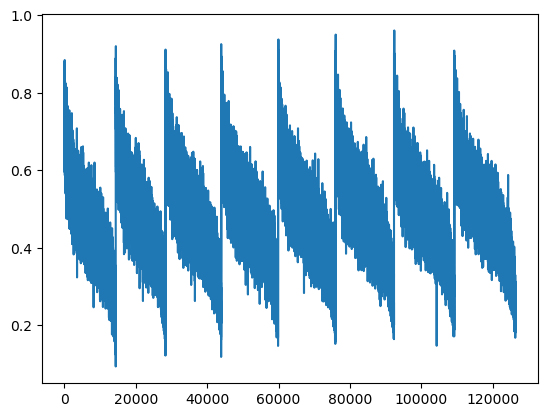

In [43]:
from matplotlib import pyplot as plt

plt.plot(a.iloc[:,0])

In [44]:
c = pd.DataFrame(svd6.inverse_transform(all_teams_reduced50))

In [50]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,0.240907,0.215543,0.144896,0.133543,0.406809,0.298698,0.398361,0.258232,0.527410,0.589692,0.435653,0.217838,0.340697,0.469362,0.429702,0.309409,0.337910,0.338805,0.614433,0.380875,0.363025,0.542959,0.873904,0.340654,0.359369,0.644649,0.400976,0.390931,0.559693,0.527370,0.371073,0.335135,0.394945,0.450332,0.510621,0.332503,0.415092,0.359943,0.541714,0.357208,0.443602,0.596199,0.859779,0.403275,0.401347,0.544686,0.318949,0.327993,0.575923,0.542482,0.375244,0.367342,0.402862,0.445481,0.547271,0.371394,0.435275,0.431932,0.535529,0.349582,0.400818,0.409923,0.139782,0.301259,0.422224,0.344538,0.302018,0.328620,0.502387,0.527714,0.363743,0.406512,0.444554,0.543327,0.464827,0.335925,0.448376,0.421021,0.528178,0.384423,0.415428,0.444076,0.096440,0.426487,0.236200,0.835051,0.288402,0.276889,0.595015,0.533166,0.328283,0.378522,0.398084,0.499673,0.513250,0.402847,0.411868,0.379541,0.514451,0.359700,0.296974,0.449633,0.929450,0.280073,0.472331,0.568450,0.407378,0.241930,0.561629,0.513441,0.398902,0.375010,0.348389,0.470377,0.481361,0.402383,0.467342,0.369926,0.522675,0.410991,0.445929,0.629729,0.837706,0.317833,0.336340,0.367925,0.224167,0.285364,0.543558,0.510544,0.344544,0.371119,0.458850,0.510843,0.555658,0.375841,0.458770,0.385124,0.545431,0.414979,0.280197,0.471963,0.914641,0.210199,0.499478,0.319996,0.325624,0.287559,0.536731,0.440825,0.349478,0.361466,0.417141,0.432732,0.540882,0.409413,0.379267,0.372531,0.525852,0.346752,0.451463,0.300777,0.269137,0.498469,0.441944,0.455308,0.181517,0.348312,0.597143,0.437366,0.400952,0.468471,0.496380,0.508189,0.501559,0.420971,0.398298,0.326368,0.497531,0.427477,0.417207,0.265242,0.263331,0.340078,0.481952,0.522308,0.197526,0.440506,0.496361,0.459033,0.370628,0.477725,0.433228,0.577499,0.444956,0.294819,0.377771,0.464436,0.534703,0.482735,0.341894,0.583306,0.071347,0.200148,0.456257,0.524674,0.318043,0.443335,0.403079,0.489758,0.444873,0.365876,0.459139,0.378710,0.458039,0.343560,0.443399,0.385878,0.540907,0.513008,0.305557,0.710962,0.071451,0.263783,0.311831,0.500476,0.395371,0.372059,0.474742,0.484742,0.398083,0.372976,0.520267,0.532032,0.463473,0.292023,0.449238,0.423691,0.507376,0.482586,0.397055,0.581690,0.821224,0.343475,0.392490,0.560402,0.229215,0.463436,0.461142,0.481358,0.400252,0.417899,0.433660,0.488890,0.495892,0.403161,0.363297,0.480670,0.496992,0.422550,0.447667,0.470085,0.215136,0.402750,0.340775,0.469661,0.253523,0.426732,0.479328,0.548244,0.382585,0.418757,0.448254,0.422510,0.462968,0.321998,0.388184,0.400920,0

In [53]:
d = teamscaler.fit_transform(all_teams_df).copy()
d = pd.DataFrame(d)# = d.rename(columns={"league_level": 400})

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [55]:
print('MAE of SVD for Team Embedding:')
abs(c-d).mean().mean()

MAE of SVD for Team Embedding:


0.0732380899448095